In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
v_list = np.arange(-0.5,0.5,0.01)
a_list = {
    '(0.1, -0.1)': [0.1,-0.1],
    '(0.1, -0.2)': [0.1,-0.2],
    '(0.1, 0.2)': [0.1,0.2]
}

In [46]:
def thomspson_lin(means, n, v, prior=[0,1]):
    regret = []
    optimal = v*max(means) * n
    
    for i in range(100):
        arm1_reward = []
        arm2_reward = []
        post = prior.copy()
        
        for j in range(1,n+1):
            theta = np.random.normal(post[0], np.sqrt(post[1]))
            a_list = [theta * each for each in means]
            reward = v*means[np.argmax(a_list)] + np.random.normal(0,1)
            if np.argmax(a_list) == 0:
                arm1_reward.append(reward)
            else:
                arm2_reward.append(reward)
            
            post[0] = 1/((1/post[1]) + means[np.argmax(a_list)]**2) * ((1/post[1])*theta + reward*means[np.argmax(a_list)])
            post[1] = 1/((1/post[1]) + means[np.argmax(a_list)]**2)
            
        regret.append(optimal - (v*means[0]*len(arm1_reward)+v*means[1]*len(arm2_reward)))
    return [np.mean(regret), np.var(regret)]

In [47]:
output = pd.DataFrame()
v_input = []
a_input = []
regret_input = []
var_input = []
for each in v_list:
    for key,val in a_list.items():
        v_input.append(each)
        a_input.append(key)
        result = thomspson_lin(val, 1000, each)
        regret_input.append(result[0])
        var_input.append(result[1])
        
output['(a1, a2)'] = a_input
output['v'] = v_input
output['regret'] = regret_input
output['variance'] = var_input

In [48]:
output

,"(a1, a2)",v,regret,variance
0,"(0.1, -0.1)",-0.50,-50.22200,819.151116
1,"(0.1, -0.2)",-0.50,-75.88950,2155.435765
2,"(0.1, 0.2)",-0.50,-30.96700,181.692561
3,"(0.1, -0.1)",-0.49,-55.40528,892.323490
4,"(0.1, -0.2)",-0.49,-69.61038,2303.070979
...,...,...,...,...
295,"(0.1, -0.2)",0.48,69.93072,1934.438487
296,"(0.1, 0.2)",0.48,24.16752,202.061698
297,"(0.1, -0.1)",0.49,41.81072,844.242985
298,"(0.1, -0.2)",0.49,66.88500,2103.405366


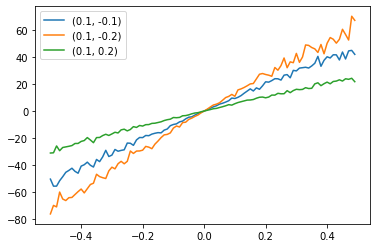

In [49]:
graph = output.groupby('(a1, a2)').agg({
    'v': lambda x: list(x),
    'regret': lambda x: list(x),
    'variance': lambda x: list(x)
}).reset_index()

for each in graph.index:
    plt.plot(graph.loc[each]['v'], graph.loc[each]['regret'], label=graph.loc[each]['(a1, a2)'])
plt.legend()

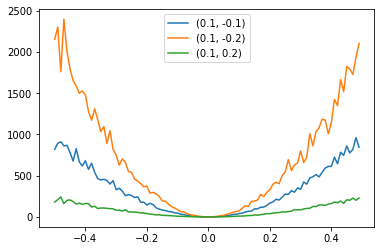

In [50]:
for each in graph.index:
    plt.plot(graph.loc[each]['v'], graph.loc[each]['variance'], label=graph.loc[each]['(a1, a2)'])
plt.legend()